In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_file(file_name):

    data_set = pd.read_csv(file_name,sep=',',index_col=4)
    
    desired_index = data_set.index

    datetime_index = pd.to_datetime(desired_index)
    
    data_set.index = datetime_index
    
    return data_set

In [3]:
DF_DataSet = read_file("C:/Users/Akwesi/Desktop/Our_Project/dataset1.csv")
DF_DataSet.head()
DF_DataSet.describe() #obtain a summary of the data...e.g mean max min std etc

3:Temperature_Comedor_Sensor  4:Temperature_Habitacion_Sensor  \
count                   2764.000000                      2764.000000   
mean                      19.199722                        18.824852   
std                        2.853315                         2.821178   
min                       11.352000                        11.076000   
25%                       17.450800                        17.060350   
50%                       19.373650                        19.021000   
75%                       21.229975                        20.828700   
max                       25.540000                        24.944000   

       5:Weather_Temperature  6:CO2_Comedor_Sensor  7:CO2_Habitacion_Sensor  \
count            2764.000000           2764.000000              2764.000000   
mean               13.897396            208.479123               211.065844   
std                 4.171991             27.032686                28.469144   
min                 0.000000            187.339000               188.907000   
25%                10.783325            200.893250               202.682750   
50%                15.000000            207.045500               209.408000   
75%                16.666700            211.245500               213.218750   
max                26.000000            594.389000               609.237000   

       8:Humedad_Comedor_Sensor  9:Humedad_Habitacion_Sensor  \
count               2764.000000                  2764.000000   
mean                  44.878420                    47.321220   
std                    6.587440                     7.557795   
min                   27.084000                    29.594700   
25%                   40.351975                    42.531325   
50%                   45.434650                    47.534700   
75%                   49.352675                    52.685975   
max                   60.957300                    62.594700   

       10:Lighting_Comedor_Sensor  11:Lighting_Habitacion_Sensor  \
count                 2764.000000                    2764.000000   
mean                    26.745381                      40.732571   
std                     23.298441                      42.326087   
min                     10.740000                      11.328000   
25%                     11.588700                      13.265300   
50%                     11.801300                      17.690000   
75%                     31.224000                      52.057350   
max                    110.693000                     162.965000   

       12:Precipitacion       ...        15:Meteo_Exterior_Sol_Oest  \
count       2764.000000       ...                       2764.000000   
mean           0.047033       ...                      14936.617682   
std            0.206705       ...                      25964.049455   
min            0.000000       ...                          0.000000   
25%            0.000000       ...                          0.000000   
50%            0.000000       ...                          0.000000   
75%            0.000000       ...                      15088.000000   
max            1.000000       ...                      95278.400000   

       16:Meteo_Exterior_Sol_Est  17:Meteo_Exterior_Sol_Sud  \
count                2764.000000                2764.000000   
mean                12248.000148               22047.525813   
std                 21758.550527               32709.387051   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                 11131.275000               38736.575000   
max                 85535.400000               95704.400000   

       18:Meteo_Exterior_Piranometro  19:Exterior_Entalpic_1  \
count                    2764.000000                  2764.0   
mean                      215.010017                     0.0   
std                       297.234046                    

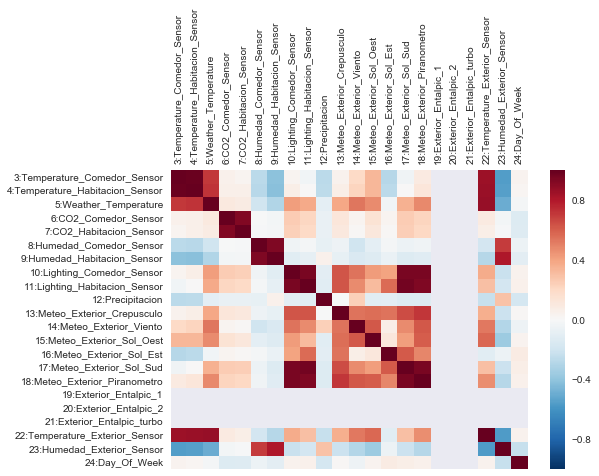

In [4]:
#we use seaborn to check the correlation of the variables
import seaborn as sns
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(DF_DataSet.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [5]:
#We selected some appropriate features to see their correlations
DF_SelectedVariables = DF_DataSet[['4:Temperature_Habitacion_Sensor', '5:Weather_Temperature','14:Meteo_Exterior_Viento',
                                    '22:Temperature_Exterior_Sensor','18:Meteo_Exterior_Piranometro']]  
DF_SelectedVariables.rename(columns={'4:Temperature_Habitacion_Sensor':'Inside_Temp_sensor','5:Weather_Temperature':'Weather_Temperature',
                                    '14:Meteo_Exterior_Viento':'External_Wind[m/s]','22:Temperature_Exterior_Sensor': 'Outside_Temp_sensor',
                                    '18:Meteo_Exterior_Piranometro':'Solar_irradiance'},inplace=True)
DF_SelectedVariables.head()

C:\Users\Akwesi\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Inside_Temp_sensor  Weather_Temperature  \
Date-Time                                                      
2012-03-13 11:45:00             17.8275                  0.0   
2012-03-13 12:00:00             18.1207                  6.8   
2012-03-13 12:15:00             18.4367                 17.0   
2012-03-13 12:30:00             18.7513                 18.0   
2012-03-13 12:45:00             19.0414                 20.0   

                     External_Wind[m/s]  Outside_Temp_sensor  Solar_irradiance  
Date-Time                                                                       
2012-03-13 11:45:00             1.42625              18.1150           758.880  
2012-03-13 12:00:00             1.59200              18.4147           762.069  
2012-03-13 12:15:00             1.89133              18.8533           766.251  
2012-03-13 12:30:00             1.82800              19.2907           766.037  
2012-03-13 12:45:00             2.36071              19.7400           762.743

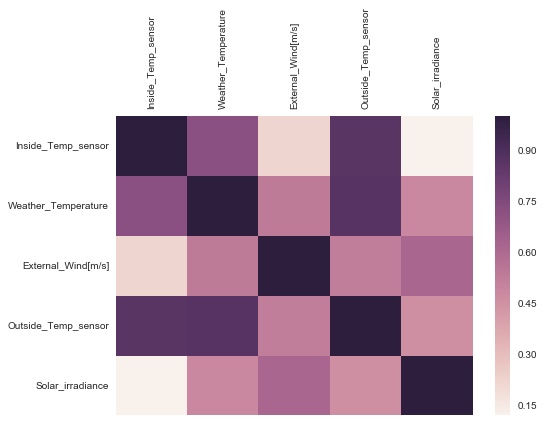

In [6]:
import seaborn as sns
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(DF_SelectedVariables.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


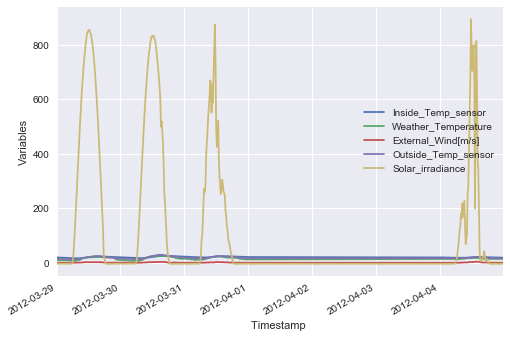

In [7]:
# for one week..Without Normalization
Selected_Data = DF_SelectedVariables['2012-03-29 00:00:00':'2012-04-04 23:45:00'] 
Selected_Data.plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

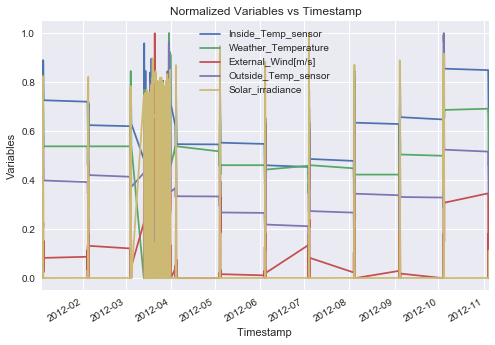

In [8]:
#Nomalizing all variable data by defining a function
def normalize(df):
    return (df - df.min())/(df.max()-df.min())   
dataSet_Normalized = normalize(DF_SelectedVariables)
dataSet_Normalized.plot()
plt.title('Normalized Variables vs Timestamp')
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

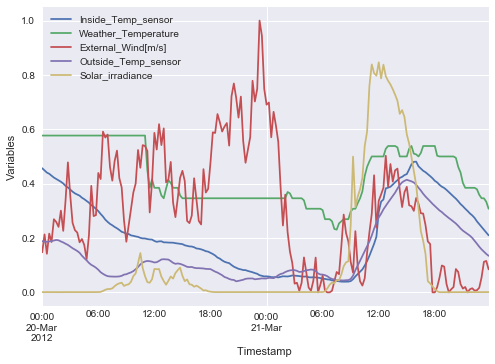

In [9]:
# In order to better check for lag with a better value we make a day slice and plot
Selected_Data1 = dataSet_Normalized['2012-03-20 00:00:00':'2012-03-21 23:45:00'] # for a day
Selected_Data1.plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

In [10]:
dataSet_Normalized['Wind_10hours'] = dataSet_Normalized['External_Wind[m/s]'].shift(40)
dataSet_Normalized['Outside_Temp_sensor_4hrs'] = dataSet_Normalized['Outside_Temp_sensor'].shift(4)
dataSet_Normalized['Solar_irradiance_1hr'] = dataSet_Normalized['Solar_irradiance'].shift(4)
dataSet_Normalized.dropna(inplace=True)
Selected = dataSet_Normalized[['Inside_Temp_sensor','Wind_10hours','Outside_Temp_sensor_4hrs','Solar_irradiance_1hr']]

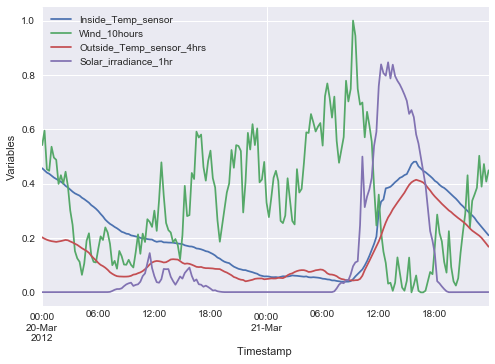

In [11]:
Selected['2012-03-20 00:00:00':'2012-03-21 23:45:00'].plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

In [12]:
dataSet_Normalized_sliced = dataSet_Normalized['2012-03-21 00:00:00':'2012-03-25 23:45:00']
Temp_Effect=dataSet_Normalized_sliced[['Inside_Temp_sensor','Outside_Temp_sensor_4hrs','Outside_Temp_sensor']]
Wind_Effect=dataSet_Normalized_sliced[['Inside_Temp_sensor','Wind_10hours','External_Wind[m/s]']]

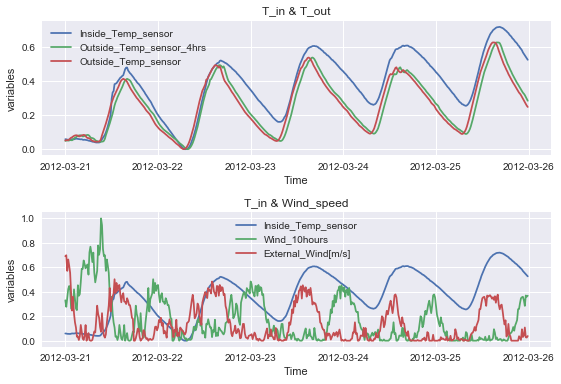

In [13]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(Temp_Effect)
plt.title('T_in & T_out')
plt.xlabel('Time')
plt.ylabel('variables')
plt.legend(Temp_Effect)

plt.subplot(2,1,2)
plt.plot(Wind_Effect)
plt.title('T_in & Wind_speed')
plt.xlabel('Time')
plt.ylabel('variables')
plt.tight_layout()
plt.legend(Wind_Effect)
plt.show()

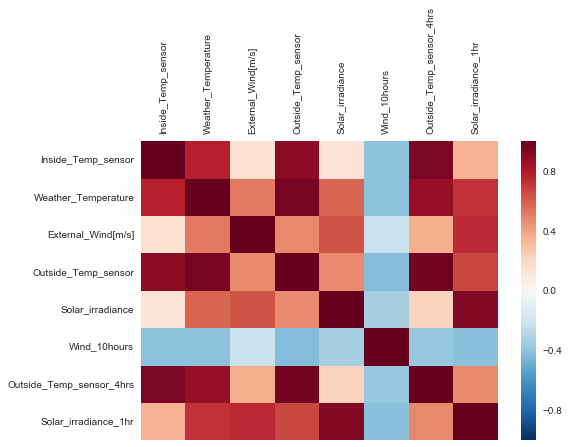

In [14]:
#checking correlation after lagging 
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(dataSet_Normalized_sliced.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

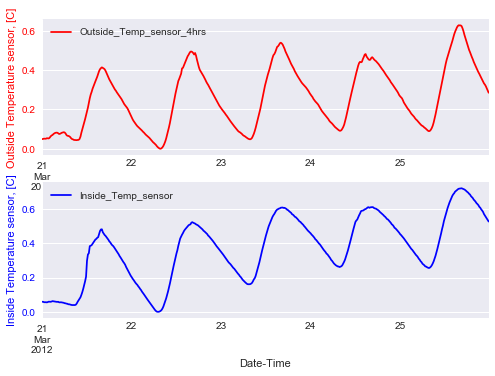

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
dataSet_Normalized_sliced.iloc[:,6].plot(ax=ax1,legend=True,color="r")
dataSet_Normalized_sliced.iloc[:,0].plot(ax=ax2,legend=True,color="b")
ax1.set_ylabel("Outside Temperature sensor, [C]", color="r")
ax2.set_ylabel("Inside Temperature sensor, [C]", color="b")
ax1.tick_params(axis='y',colors='r')
ax2.tick_params(axis='y',colors='b')
plt.show()

# Machine Learning and Prediction using sklearn library in python

In [16]:
#we select our variables we want to model 
DF_SelectedVariables=dataSet_Normalized[['Inside_Temp_sensor','Outside_Temp_sensor_4hrs','Wind_10hours']]

#Testing Our Model
target = DF_SelectedVariables['Inside_Temp_sensor']
features = DF_SelectedVariables[['Outside_Temp_sensor_4hrs','Wind_10hours']]

# Method 1:Using Linear regression

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=123524)

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)
prediction = linear_reg.predict(X_test)
predict_series = pd.Series(prediction.ravel(),index=y_test.index).rename('Predicted T_in')
joined = pd.DataFrame(predict_series).join(y_test)
#joined.isnull()

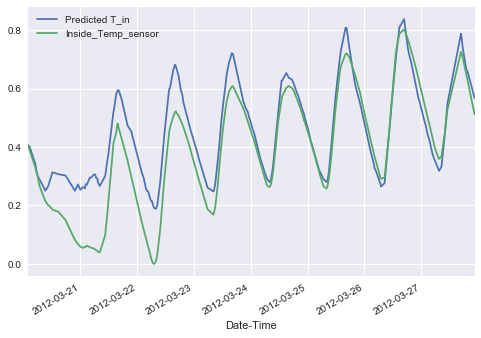

In [18]:
joined['2012-03-20':'2012-03-27'].plot()
plt.show()
plt.xlabel('Timestamp')
plt.ylabel('variables')

In [19]:
# Calculating the accuracy metrics of the implemented machine learning model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score = r2_score(y_test,prediction)
mean_absolute_error = mean_absolute_error(y_test,prediction)
mean_squared_error = mean_squared_error(y_test,prediction)
coeff_variation = np.sqrt(mean_squared_error)/y_test.mean()
print "The R2_score is: "+str(R2_score)
print "The Mean absoulute error is: "+str(mean_absolute_error)
print "The Mean squared error is: "+str(mean_squared_error)
print "The Coefficient of variation is: "+str(coeff_variation)

The R2_score is: 0.839563453039
The Mean absoulute error is: 0.063827141196
The Mean squared error is: 0.00683025499068
The Coefficient of variation is: 0.149500855571


# Method 2:Using support vector machines,SVM

In [20]:
#Input for SVR should be normalized tables only
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
SVR_reg = SVR(kernel='rbf',C=10,gamma=1)
predict_SVR_CV = cross_val_predict(SVR_reg,features,target,cv=10)
predict_DF_SVR_CV=pd.DataFrame(predict_SVR_CV, index = target.index,columns=["Predicted T_in_SVR_CV"])
predict_DF_SVR_CV = predict_DF_SVR_CV.join(target).dropna()

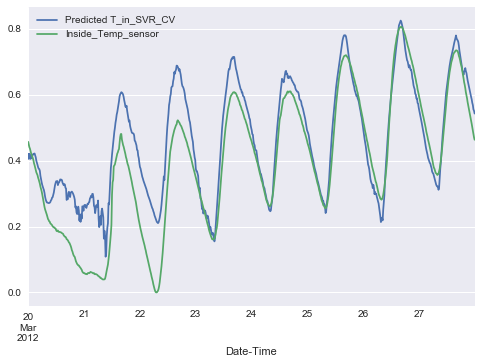

In [24]:
# Plotting the learned dataset and verifying the predicted values with actual ones
predict_DF_SVR_CV['2012-03-20':'2012-03-27'].plot()
plt.show()

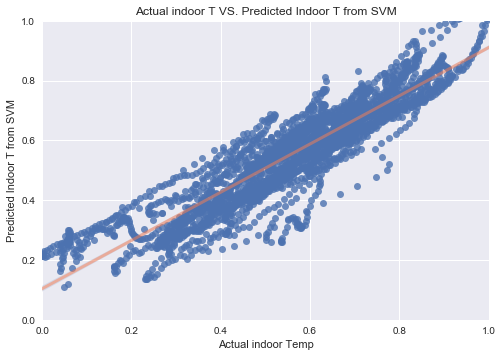

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = sns.regplot(x='Inside_Temp_sensor', y="Predicted T_in_SVR_CV",
                   data=predict_DF_SVR_CV,ax=ax1,
                   line_kws={"lw":3,"alpha":0.5})
plt.title('Actual indoor T VS. Predicted Indoor T from SVM')
plot.set_xlim([0,1])
plot.set_ylim([0,1])
plot.set_xlabel('Actual indoor Temp')
plot.set_ylabel('Predicted Indoor T from SVM')
regline = plot.get_lines()[0];
regline.set_color('coral')
plt.show()

In [26]:
# Calculating the accuracy metrics of the implemented machine learning model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score_DF_SVR_CV = r2_score(predict_DF_SVR_CV['Inside_Temp_sensor'],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
mean_absolute_error_SVR_CV = mean_absolute_error(predict_DF_SVR_CV["Inside_Temp_sensor"],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
mean_squared_error_SVR_CV = mean_squared_error(predict_DF_SVR_CV["Inside_Temp_sensor"],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
coeff_variation_SVR_CV = np.sqrt(mean_squared_error_SVR_CV)/predict_DF_SVR_CV["Inside_Temp_sensor"].mean()
print "The R2_score for SVR is: "+str(R2_score_DF_SVR_CV)
print "The Mean absoulute error for SVR is: "+str(mean_absolute_error_SVR_CV)
print "The Mean squared error for SVR is: "+str(mean_squared_error_SVR_CV)
print "The Coefficient of variation for SVR is: "+str(coeff_variation_SVR_CV)

The R2_score for SVR is: 0.829216972387
The Mean absoulute error for SVR is: 0.064759279104
The Mean squared error for SVR is: 0.00701400526592
The Coefficient of variation for SVR is: 0.150709948031


# Method 3: Implementing Random Forest regression approach to test the performance of the machine learning model

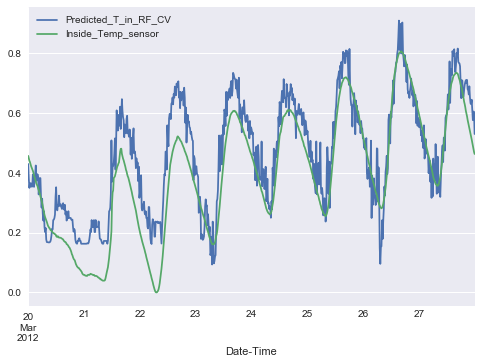

In [27]:
from sklearn.model_selection import cross_val_predict 
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()
predict_RF_CV = cross_val_predict(reg_RF,features,target,cv=10) 
predict_DF_RF_CV=pd.DataFrame(predict_RF_CV, index = target.index,columns=['Predicted_T_in_RF_CV'])
predict_DF_RF_CV = predict_DF_RF_CV.join(target).dropna()

predict_DF_RF_CV['2012-03-20':'2012-03-27'].plot()
plt.show()

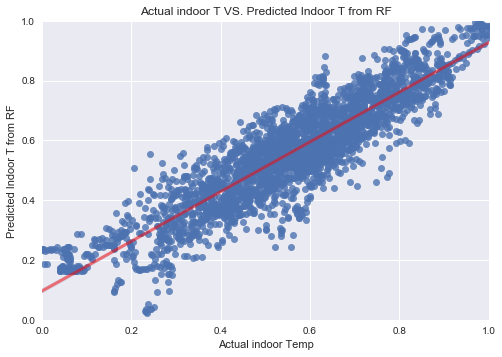

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = sns.regplot(x='Inside_Temp_sensor', y='Predicted_T_in_RF_CV',
                   data=predict_DF_RF_CV,ax=ax1,
                   line_kws={"lw":3,"alpha":0.5})
plt.title('Actual indoor T VS. Predicted Indoor T from RF')
plot.set_xlim([0,1])
plot.set_ylim([0,1])
plot.set_xlabel('Actual indoor Temp')
plot.set_ylabel('Predicted Indoor T from RF')
regline = plot.get_lines()[0];
regline.set_color('r')
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score_DF_RF_CV = r2_score(predict_DF_RF_CV['Inside_Temp_sensor'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
mean_absolute_error_DF_CV =  mean_absolute_error(predict_DF_RF_CV['Inside_Temp_sensor'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
mean_squared_error_DF_CV = mean_squared_error(predict_DF_RF_CV['Inside_Temp_sensor'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
coeff_variation_DF_CV = np.sqrt(mean_squared_error_DF_CV)/predict_DF_RF_CV['Inside_Temp_sensor'].mean()
print "The R2_score for RF is: "+str(R2_score_DF_RF_CV)
print "The Mean absoulute for RF error is: "+str(mean_absolute_error_DF_CV)
print "The Mean squared error for RF is: "+str(mean_squared_error_DF_CV)
print "The Coefficient of variation for RF is: "+str(coeff_variation_DF_CV)

The R2_score for RF is: 0.814338416675
The Mean absoulute for RF error is: 0.0697685558836
The Mean squared error for RF is: 0.0076250628726
The Coefficient of variation for RF is: 0.157137771871


In [32]:
#Making a table of our anaylsis from the machine Learning process..using Dictionary
df = pd.DataFrame({'Metrics':['R2_score','mean absolute error','mean squared error','coefficient variation'],
                'Linear Regression':[R2_score,mean_absolute_error,mean_squared_error,coeff_variation],
                'SVM':[R2_score_DF_SVR_CV,mean_absolute_error_SVR_CV,mean_squared_error_SVR_CV,coeff_variation_SVR_CV],
                'Random Forest':[R2_score_DF_RF_CV,mean_absolute_error_DF_CV,mean_squared_error_DF_CV,coeff_variation_DF_CV]})
df.set_index('Metrics',inplace=True)
df.index.name=None
df.round(4)

Linear Regression  \
R2_score                                                        0.839563   
mean absolute error    <function mean_absolute_error at 0x000000000E9...   
mean squared error     <function mean_squared_error at 0x000000000E91...   
coefficient variation                                           0.149501   

                       Random Forest     SVM  
R2_score                      0.8143  0.8292  
mean absolute error           0.0698  0.0648  
mean squared error            0.0076  0.0070  
coefficient variation         0.1571  0.1507